# Evaluation

## Imports

In [1]:
import sys
import os

repo_path = os.path.sep.join(os.getcwd().split(os.path.sep)[:-3])
sys.path.append(repo_path)
print(repo_path)
# solves problems for Mac Users
os.chdir(repo_path)


/home/schilcherj/master/deepClustering/LMU_Master_Practical_SoSe24


In [2]:
%load_ext autoreload
%autoreload 2

import random
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
from clustpy.data.real_torchvision_data import load_mnist, load_usps, load_fmnist, load_cifar10
from clustpy.deep.autoencoders import FeedforwardAutoencoder, ConvolutionalAutoencoder

from practical.DeepClustering.DipECT.dipect import DipECT
from practical.DeepClustering.DipECT.evaluation_pipeline import DatasetType, AutoencoderType, get_dataset

from practical.DeepClustering.DipECT.metrics_visualization import (
    visualize_peformance_AE, 
    load_results, 
    show_augmented_data, 
    build_and_visualize_splitindex_tree, 
    build_and_visualize_tree, 
    visualize_prediction_subclusters, 
    visualize_tree_growth_step, 
    plot_mean_metrics
)


/home/schilcherj/master/deepClustering/deepClustEnv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-14 16:20:28,891	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-14 16:20:29,339	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


## Preliminary setting

### Visualizing pretrained autoencoders

##### MNIST

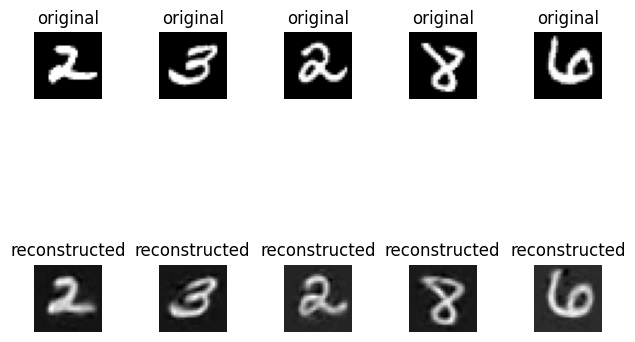

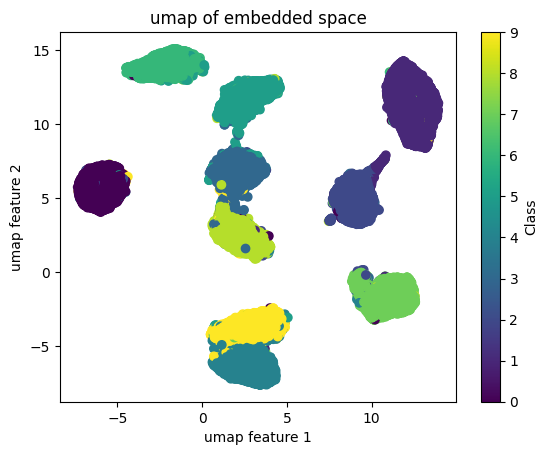

In [18]:
dataset, labels = load_mnist(return_X_y=True)
autoencoder = FeedforwardAutoencoder([dataset.shape[1], 500, 500, 2000, 10])
autoencoder.load_state_dict(torch.load("practical/DeepClustering/DipECT/feedforward_mnist_100_10_scaled.pth"))
visualize_peformance_AE(autoencoder, dataset/255, labels, (28,28), 5)

##### FMNIST

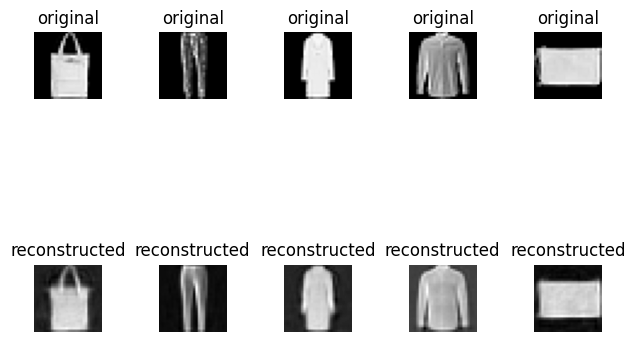

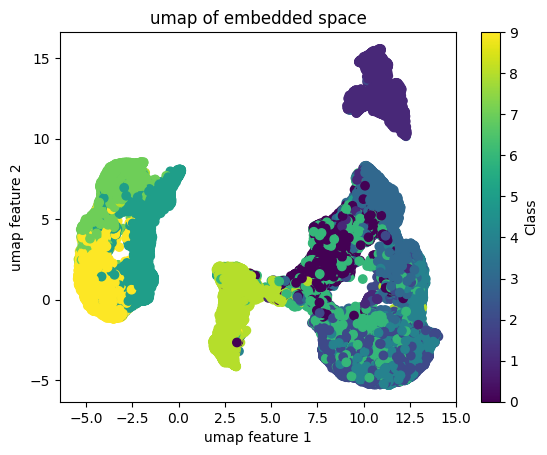

In [34]:
dataset, labels = load_fmnist(return_X_y=True)
autoencoder = FeedforwardAutoencoder([dataset.shape[1], 500, 500, 2000, 10])
autoencoder.load_state_dict(torch.load("practical/DeepClustering/DipECT/feedforward_fmnist_100_10_scaled.pth"))
visualize_peformance_AE(autoencoder, dataset/255, labels, (28,28), 5)

### Visualization of augmented data

##### MNIST

tensor(1.)
tensor(0.)


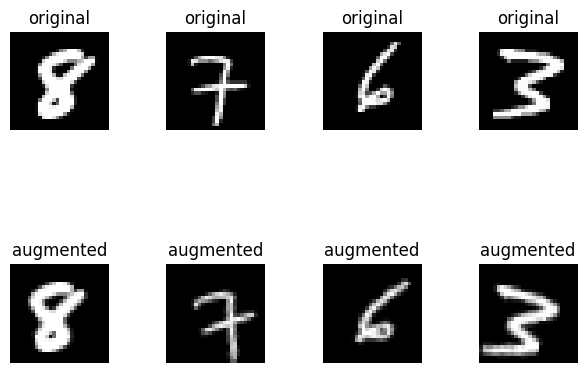

In [22]:
dataset, labels = load_mnist(return_X_y=True)
show_augmented_data(dataset/255, DatasetType.MNIST, (28, 28), 4)

##### FMNIST

tensor(0.9961)
tensor(0.)


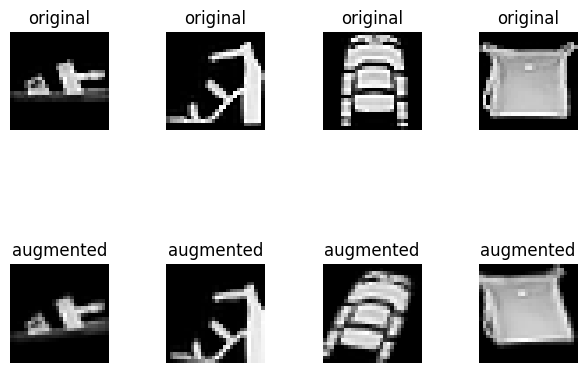

In [36]:
dataset, labels = load_fmnist(return_X_y=True)
show_augmented_data(dataset/255, DatasetType.FASHION_MNIST, (28, 28), 4)

## Visualizations

### Prediction of subclusters

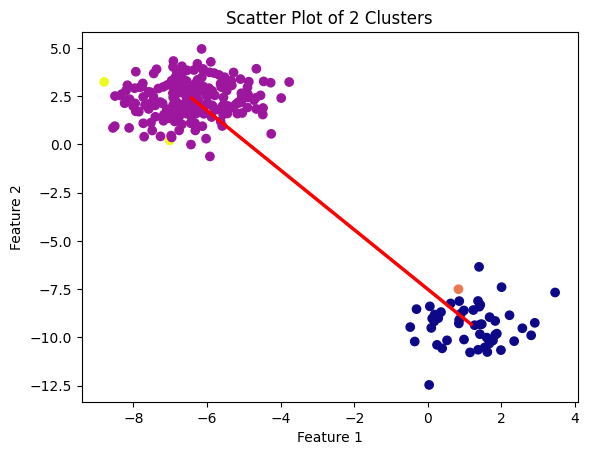

In [57]:
X1, y1 = make_blobs(n_samples=50, centers=1,)
X2, y2 = make_blobs(n_samples=200, centers=1, )
visualize_prediction_subclusters(X1, X2, y1, y2)

The yellow points indicate the modal interval, whereas the orange point indicates the middle point of the modal triangle

#### Visualizing a tree grow step

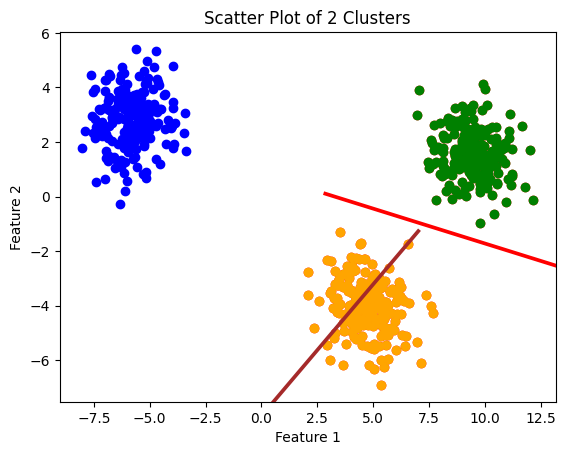

In [81]:
X, _ = make_blobs(n_samples=600, centers=3)
visualize_tree_growth_step(X)

### Tree Visualization

##### MNIST

In [ ]:
dataset, labels = load_mnist(return_X_y=True)
autoencoder = FeedforwardAutoencoder([dataset.shape[1], 500, 500, 2000, 10])
autoencoder.load_state_dict(torch.load("practical/DeepClustering/DipECT/feedforward_mnist_100_10_scaled.pth"))
autoencoder.fitted = True

dipect_mnist = DipECT(
        batch_size=256,
        autoencoder=autoencoder,
        autoencoder_param_path="practical/DeepClustering/DipECT/feedforward_mnist_100_10_scaled.pth",
        autoencoder_pretrain_n_epochs=100,
        logging_active=True,
        clustering_n_epochs=60,
        clustering_optimizer_params={"lr": 1e-4},
        early_stopping=False,
        loss_weight_function_normalization=-1,
        multimodal_loss_application="all",
        multimodal_loss_node_criteria_method="equal",  # "time_of_split",
        multimodal_loss_weight_direction="ascending",
        multimodal_loss_weight_function="linear",  # "linear",
        multimodal_loss_weight=836.5918099811238,
        projection_axis_learning="all",
        projection_axis_learning_rate=1e-05,
        projection_axis_init="kmeansk",
        projection_axis_n_init=7,
        pruning_factor=1.0,
        pruning_strategy="epoch_assessment",
        pruning_threshold=dataset.shape[0] // 35,
        tree_growth_min_cluster_size=dataset.shape[0] // 35,
        reconstruction_loss_weight=737.0094829591326,
        refinement_epochs=0,
        tree_growth_amount=5,
        tree_growth_frequency=2.0,
        tree_growth_unimodality_treshold=0.975,
        tree_growth_upper_bound_leaf_nodes=100,
        tree_growth_use_unimodality_pvalue=True,
        unimodal_loss_application="leaf_nodes",
        unimodal_loss_node_criteria_method="equal",
        unimodal_loss_weight=653.6111443720175,
        unimodal_loss_weight_direction="ascending",
        unimodal_loss_weight_function="log",
        evaluate_every_n_epochs=4,
    )
dipect_mnist.fit_predict(dataset/255, labels)

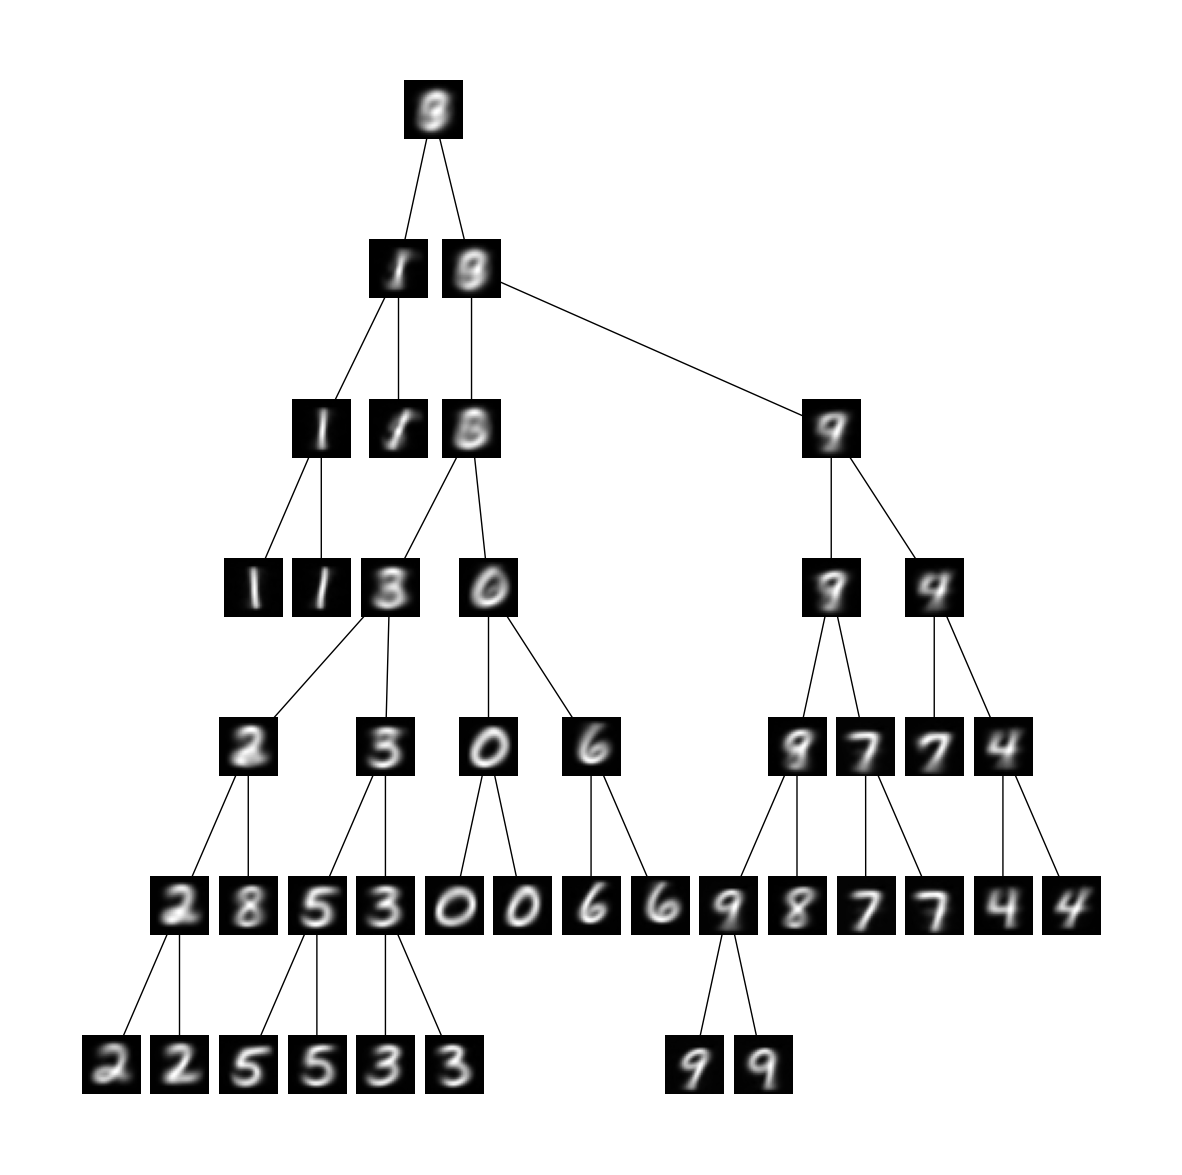

In [29]:
build_and_visualize_tree(dipect_mnist.tree_.root, dipect_mnist.autoencoder, dataset/255, (28,28))

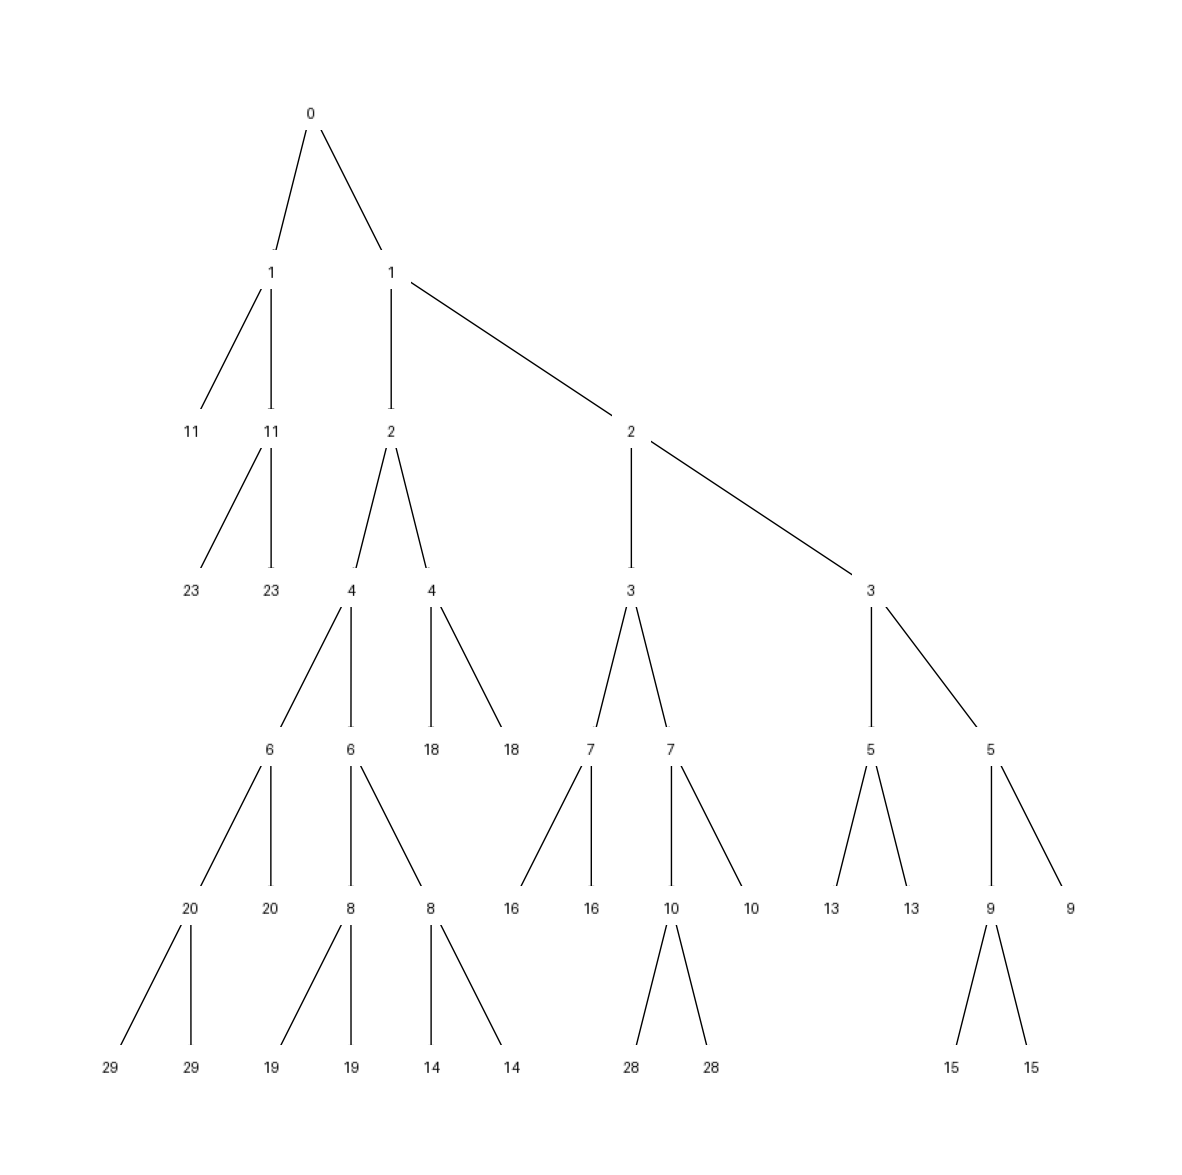

In [13]:
build_and_visualize_splitindex_tree(dipect_mnist.tree_.root)

##### Image Tree

In [ ]:
dataset, labels = load_fmnist(return_X_y=True)

dipect_fmnist = DipECT(
        batch_size=256,
        autoencoder_param_path="practical/DeepClustering/DipECT/feedforward_fmnist_100_10_scaled.pth",
        autoencoder_pretrain_n_epochs=100,
        logging_active=True,
        clustering_n_epochs=60,
        clustering_optimizer_params={"lr": 1e-4},
        early_stopping=False,
        loss_weight_function_normalization=-1,
        multimodal_loss_application="all",
        multimodal_loss_node_criteria_method="equal",  # "time_of_split",
        multimodal_loss_weight_direction="ascending",
        multimodal_loss_weight_function="linear",  # "linear",
        multimodal_loss_weight=836.5918099811238,
        projection_axis_learning="all",
        projection_axis_learning_rate=1e-05,
        projection_axis_init="kmeansk",
        projection_axis_n_init=7,
        pruning_factor=1.0,
        pruning_strategy="epoch_assessment",
        pruning_threshold=dataset.shape[0] // 35,
        tree_growth_min_cluster_size=dataset.shape[0] // 35,
        reconstruction_loss_weight=737.0094829591326,
        refinement_epochs=0,
        tree_growth_amount=5,
        tree_growth_frequency=2.0,
        tree_growth_unimodality_treshold=0.975,
        tree_growth_upper_bound_leaf_nodes=100,
        tree_growth_use_unimodality_pvalue=True,
        unimodal_loss_application="leaf_nodes",
        unimodal_loss_node_criteria_method="equal",
        unimodal_loss_weight=653.6111443720175,
        unimodal_loss_weight_direction="ascending",
        unimodal_loss_weight_function="log",
        evaluate_every_n_epochs=4,
    )
dipect_fmnist.fit_predict(dataset/255, labels)

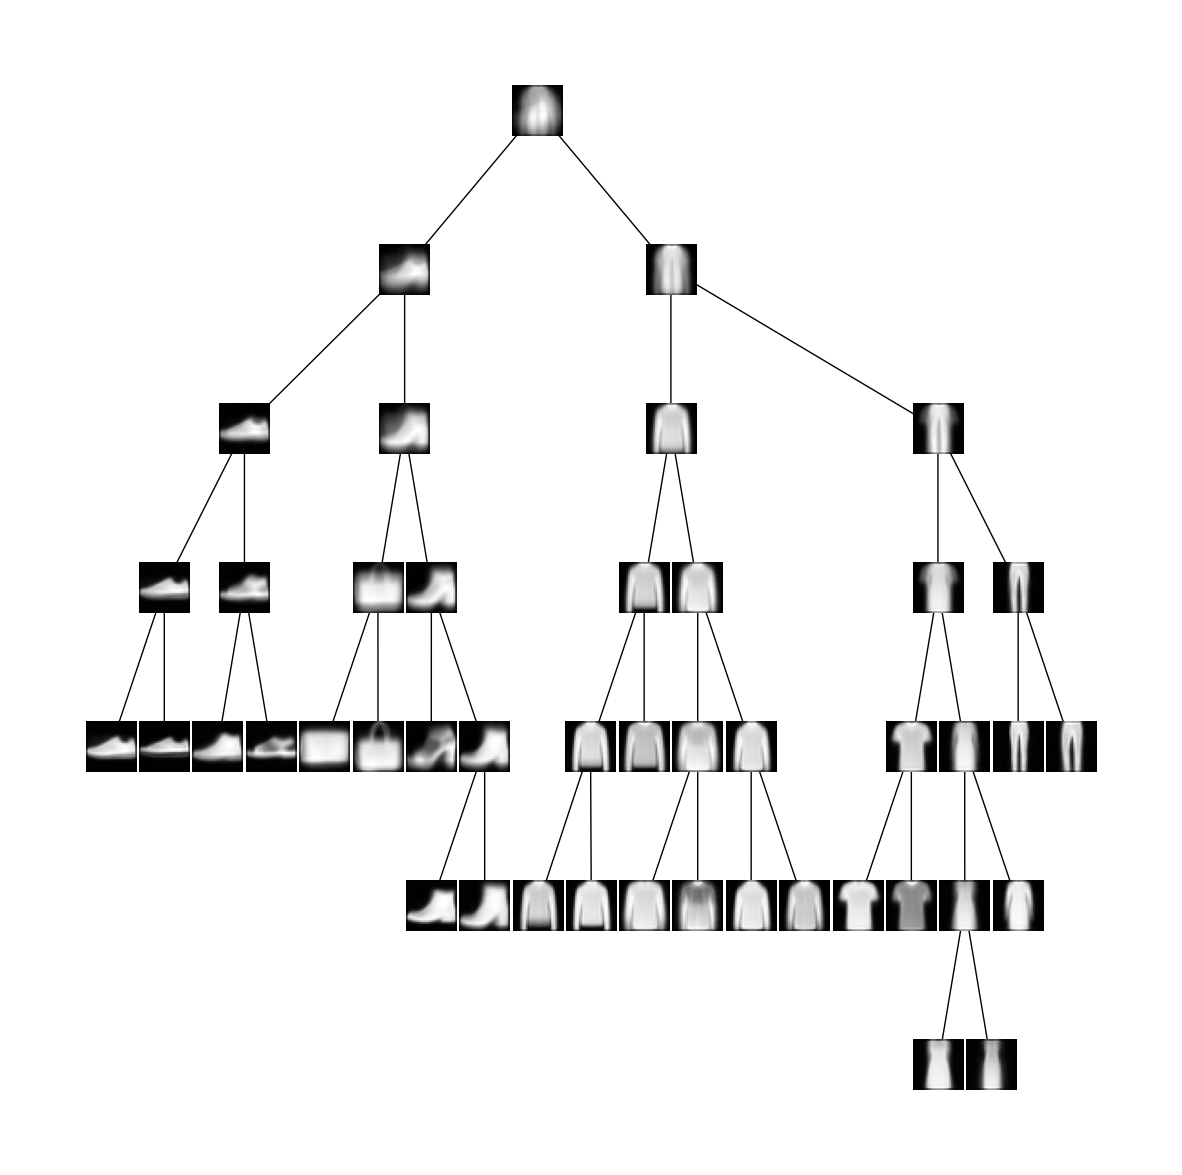

In [32]:
build_and_visualize_tree(dipect_fmnist.tree_.root, dipect_fmnist.autoencoder, dataset/255, (28,28))

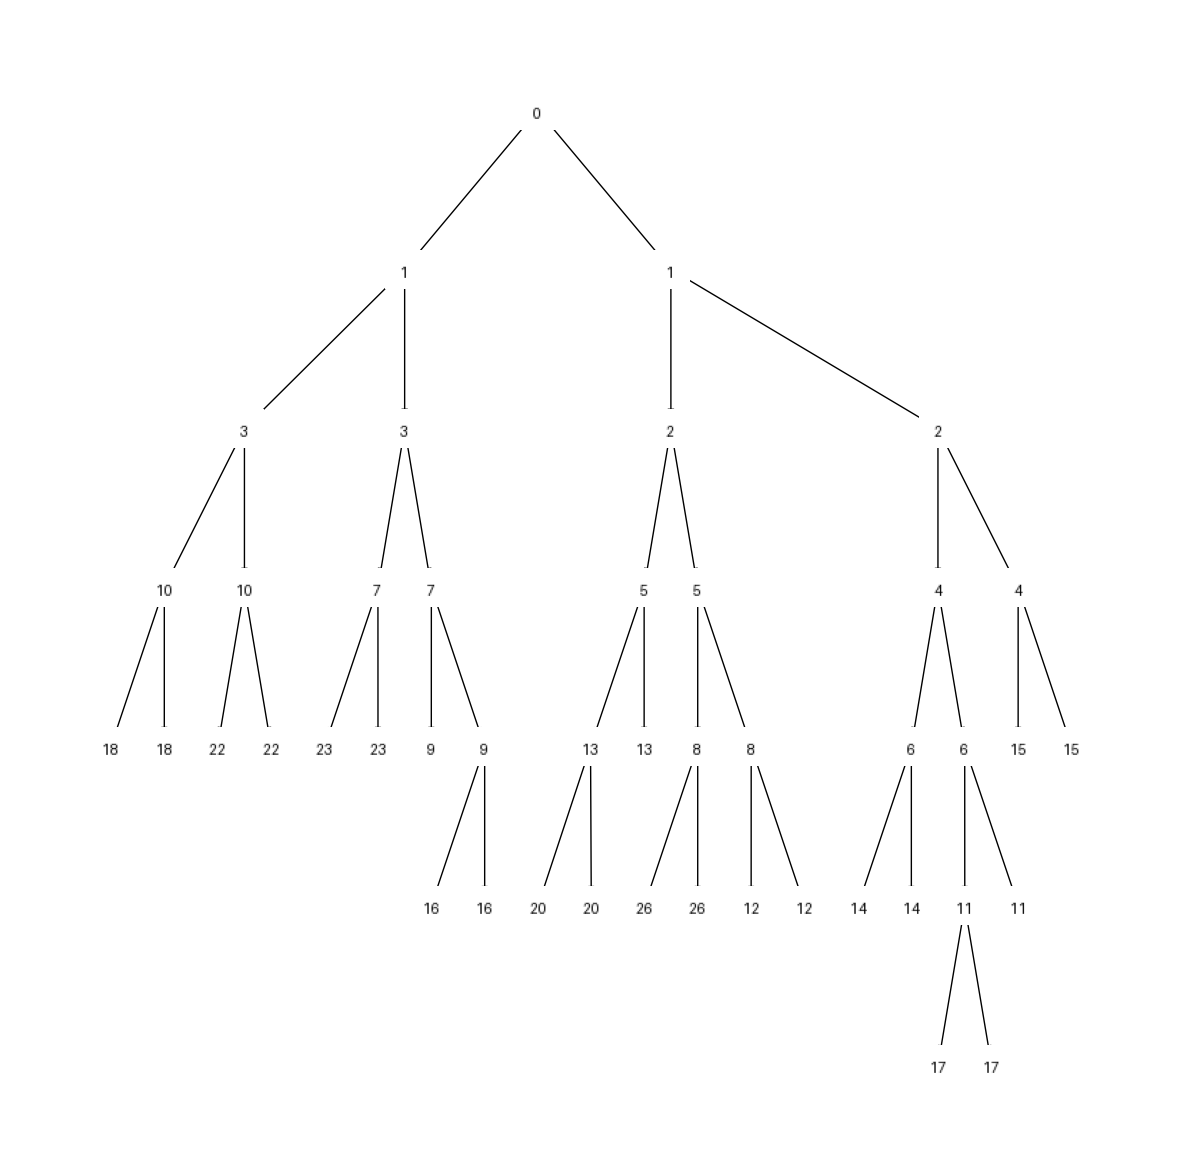

In [33]:
build_and_visualize_splitindex_tree(dipect_fmnist.tree_.root)

## Results

In [3]:
(
    flat_results,
    flat_combined,
    flat_results_html,
    hierarchical_results,
    hierarchical_combined,
    hierarchical_results_html,
) = load_results()

/home/loebbert/projects/deepclustering/LMU_Master_Practical_SoSe24/practical/DeepClustering/DipECT/metrics_visualization.py:553: FutureWarning: The provided callable <function mean at 0x7f07883951b0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  flat_combined_df.pivot_table(
/home/loebbert/projects/deepclustering/LMU_Master_Practical_SoSe24/practical/DeepClustering/DipECT/metrics_visualization.py:637: FutureWarning: The provided callable <function mean at 0x7f07883951b0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  hierarchical_combined.pivot_table(


### DipECT Only

### Flat Results Comparison

In [4]:
flat_results["MNIST"]

nmi         acc        \
                                                   mean   std  mean   std   
autoencoder         method                                                  
ClustPy FeedForward DeepECT (Ours)                 0.81  0.03  0.81  0.02   
                    DeepECT + Augmentation (Ours)  0.74  0.04  0.73  0.09   
                    DipECT                         0.84  0.03  0.89  0.05   
                    DipECT + Augmentation          0.78  0.04  0.79  0.08   
                    IDEC                           0.82  0.03  0.83  0.03   
                    KMeans                         0.73  0.02  0.78  0.04   

                                                    ari        
                                                   mean   std  
autoencoder         method                                     
ClustPy FeedForward DeepECT (Ours)                 0.74  0.03  
                    DeepECT + Augmentation (Ours)  0.61  0.09  
                    DipECT                         0.81  0.06  
                    DipECT + Augmentation          0.72  0.06  
                    IDEC                           0.76  0.05  
                    KMeans                         0.67  0.03

In [5]:
flat_results["USPS"]

nmi         acc        \
                                                   mean   std  mean   std   
autoencoder         method                                                  
ClustPy FeedForward DeepECT (Ours)                 0.71  0.03  0.71  0.03   
                    DeepECT + Augmentation (Ours)  0.74  0.03  0.69  0.03   
                    DipECT                         0.69  0.01  0.67  0.01   
                    DipECT + Augmentation          0.62  0.06  0.60  0.01   
                    IDEC                           0.74  0.03  0.77  0.04   
                    KMeans                         0.65  0.00  0.69  0.00   

                                                    ari        
                                                   mean   std  
autoencoder         method                                     
ClustPy FeedForward DeepECT (Ours)                 0.61  0.04  
                    DeepECT + Augmentation (Ours)  0.63  0.02  
                    DipECT                         0.57  0.01  
                    DipECT + Augmentation          0.53  0.06  
                    IDEC                           0.67  0.04  
                    KMeans                         0.55  0.00

In [6]:
flat_results["Fashion MNIST"]

nmi         acc        \
                                                   mean   std  mean   std   
autoencoder         method                                                  
ClustPy FeedForward DeepECT (Ours)                 0.60  0.01  0.54  0.01   
                    DeepECT + Augmentation (Ours)  0.37  0.26  0.33  0.23   
                    DipECT                         0.58  0.04  0.59  0.06   
                    DipECT + Augmentation          0.59  0.01  0.57  0.03   
                    IDEC                           0.53  0.01  0.50  0.02   
                    KMeans                         0.55  0.00  0.52  0.01   

                                                    ari        
                                                   mean   std  
autoencoder         method                                     
ClustPy FeedForward DeepECT (Ours)                 0.41  0.02  
                    DeepECT + Augmentation (Ours)  0.25  0.18  
                    DipECT                         0.43  0.05  
                    DipECT + Augmentation          0.45  0.02  
                    IDEC                           0.36  0.01  
                    KMeans                         0.39  0.01

In [7]:
flat_results["Reuters"]

nmi         acc        \
                                                   mean   std  mean   std   
autoencoder         method                                                  
ClustPy FeedForward DeepECT (Ours)                 0.28  0.04  0.55  0.05   
                    DeepECT + Augmentation (Ours)  0.00  0.00  0.00  0.00   
                    DipECT                         0.33  0.06  0.61  0.02   
                    DipECT + Augmentation          0.00  0.00  0.00  0.00   
                    IDEC                           0.32  0.14  0.54  0.08   
                    KMeans                         0.39  0.04  0.63  0.07   

                                                    ari        
                                                   mean   std  
autoencoder         method                                     
ClustPy FeedForward DeepECT (Ours)                 0.24  0.07  
                    DeepECT + Augmentation (Ours)  0.00  0.00  
                    DipECT                         0.31  0.06  
                    DipECT + Augmentation          0.00  0.00  
                    IDEC                           0.27  0.13  
                    KMeans                         0.37  0.08

### Hierarchical Results Comparison

In [8]:
hierarchical_results["MNIST"]

dp          lp      
                                                   mean   std  mean   std
autoencoder         method                                               
ClustPy FeedForward Autoencoder + Bisection        0.50  0.02  0.79  0.03
                    DeepECT (Ours)                 0.84  0.03  0.94  0.00
                    DeepECT + Augmentation (Ours)  0.69  0.07  0.90  0.03
                    DipECT                         0.80  0.05  0.91  0.04
                    DipECT + Augmentation          0.77  0.06  0.90  0.04

In [9]:
hierarchical_results["USPS"]

dp          lp      
                                                   mean   std  mean   std
autoencoder         method                                               
ClustPy FeedForward Autoencoder + Bisection        0.49  0.01  0.74  0.02
                    DeepECT (Ours)                 0.73  0.03  0.87  0.02
                    DeepECT + Augmentation (Ours)  0.79  0.04  0.90  0.03
                    DipECT                         0.67  0.04  0.83  0.02
                    DipECT + Augmentation          0.64  0.06  0.77  0.04

In [10]:
hierarchical_results["Fashion MNIST"]

dp          lp      
                                                   mean   std  mean   std
autoencoder         method                                               
ClustPy FeedForward Autoencoder + Bisection        0.44  0.01  0.66  0.01
                    DeepECT (Ours)                 0.51  0.02  0.73  0.02
                    DeepECT + Augmentation (Ours)  0.35  0.12  0.51  0.22
                    DipECT                         0.50  0.05  0.70  0.03
                    DipECT + Augmentation          0.50  0.00  0.68  0.02

In [11]:
hierarchical_results["Reuters"]

dp          lp      
                                                   mean   std  mean   std
autoencoder         method                                               
ClustPy FeedForward Autoencoder + Bisection        0.60  0.02  0.78  0.01
                    DeepECT (Ours)                 0.61  0.04  0.83  0.04
                    DeepECT + Augmentation (Ours)  0.00  0.00  0.00  0.00
                    DipECT                         0.61  0.03  0.77  0.01
                    DipECT + Augmentation          0.00  0.00  0.00  0.00